## Iris ata analysis 

#### Disabling Sklearn Deprecation Warnings as they make the output hard to read

In [665]:
import warnings

from sklearn.exceptions import DataConversionWarning

warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=DeprecationWarning)
warnings.filterwarnings("ignore", category=DataConversionWarning)


### Problem 1: Data acquisition

In [666]:
import pandas as pd
from pandas import DataFrame
from sklearn.datasets import load_iris

iris = load_iris()


#### Reading the explanatory variables 

In [667]:
x = pd.DataFrame(iris['data'], columns=iris['feature_names'])
x.head()


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


#### Reading the objective variable 

In [668]:
y = DataFrame(iris.target, columns=['Species'])
y.head()

,Species
0,0
1,0
2,0
3,0
4,0


### Problem 2: Combining data

In [669]:
xy = pd.concat([x, y], axis=1)
xy.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


### Problem 3: Checking the data

#### Display the 4th sample from the beginning and see what each feature is like

In [670]:
xy.iloc[3]

sepal length (cm)    4.6
sepal width (cm)     3.1
petal length (cm)    1.5
petal width (cm)     0.2
Species              0.0
Name: 3, dtype: float64

#### Output the total number of samples for each label

In [671]:
xy['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

#### Check if there is a missing value in the feature quantity.

In [672]:
xy.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
Species              0
dtype: int64

#### Display the mean, standard deviation, and quartiles of the feature values at once.

In [673]:
xy.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


### Problem 4: Examining the iris dataset itself

From the author's (FISHER, 1936) original paper 'THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS' we can learn the following: 
- The ratio of the difference between means to standard error in individual plants is crucial for assessing the probability of misclassification based on compound measurements.
- A variance estimation method results in a standard deviation of 3.3804 cm, allowing for the calculation of the misclassification probability (less than three per million).
- The chosen compound measurement (X) is analyzed for variation within and between species, revealing that 96.3417% of the total variation is between species.
- The text explores the application of the procedure to samples from more than two populations, specifically considering Iris virginica, a tetraploid species with chromosomal differences, in relation to I. setosa and I. versicolor.
- The analysis examines whether I. versicolor, potentially a polyploid hybrid, demonstrates an intermediate mean value and if its difference from I. setosa is twice that from I. virginica, considering additive gene effects in hybrids.

SOURCE: FISHER, R. A. (1936). THE USE OF MULTIPLE MEASUREMENTS IN TAXONOMIC PROBLEMS. Annals of Eugenics, 7(2), 179–188. https://doi.org/10.1111/j.1469-1809.1936.tb02137.x

### Problem 5: Extracting the required data

#### Extract the sepal_width column in two different ways

In [674]:
# Reading sepal_width by column name
xy['sepal width (cm)'].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

In [675]:
# Reading sepal_width by column index
xy.iloc[:, 1].head()

0    3.5
1    3.0
2    3.2
3    3.1
4    3.6
Name: sepal width (cm), dtype: float64

#### Extract the 50th to 99th data

In [676]:
xy.iloc[50 : 99]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1
55,5.7,2.8,4.5,1.3,1
56,6.3,3.3,4.7,1.6,1
57,4.9,2.4,3.3,1.0,1
58,6.6,2.9,4.6,1.3,1
59,5.2,2.7,3.9,1.4,1


#### Extract the 50th to 99th data of the petal_length column

In [677]:
xy.iloc[:, 2].iloc[50: 99]

50    4.7
51    4.5
52    4.9
53    4.0
54    4.6
55    4.5
56    4.7
57    3.3
58    4.6
59    3.9
60    3.5
61    4.2
62    4.0
63    4.7
64    3.6
65    4.4
66    4.5
67    4.1
68    4.5
69    3.9
70    4.8
71    4.0
72    4.9
73    4.7
74    4.3
75    4.4
76    4.8
77    5.0
78    4.5
79    3.5
80    3.8
81    3.7
82    3.9
83    5.1
84    4.5
85    4.5
86    4.7
87    4.4
88    4.1
89    4.0
90    4.4
91    4.6
92    4.0
93    3.3
94    4.2
95    4.2
96    4.2
97    4.3
98    3.0
Name: petal length (cm), dtype: float64

#### Extracting the required data

In [678]:
xy.loc[xy.iloc[:, 3] == 0.2]

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
10,5.4,3.7,1.5,0.2,0
11,4.8,3.4,1.6,0.2,0
14,5.8,4.0,1.2,0.2,0


#### The difference between the loc and iloc 

> The difference between the loc and iloc functions is that the loc function selects rows using row labels (e.g. tea) whereas the iloc function selects rows using their integer positions (staring from 0 and going up by one for each row).

SOURCE: Chan, K., & Fagen-Ulmschneider, W. (2022, July 26). DataFrame Indexing: .loc[] vs .iloc[]. Data Science Discovery. https://discovery.cs.illinois.edu/guides/DataFrame-Fundamentals/dataframe-loc-vs-iloc/

### Problem 6: Creating a diagram

####  Pie chart of the number of samples per label

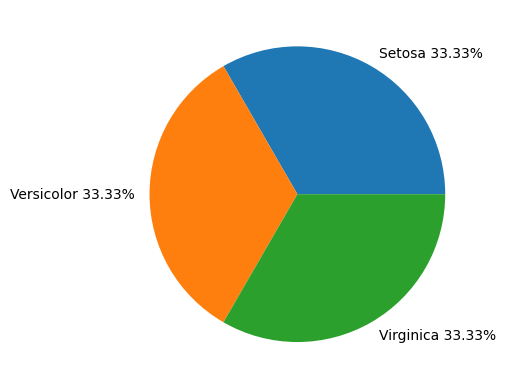

In [679]:
import matplotlib.pyplot as plt
import numpy as np

def get_percentage(label: int) -> float:
    matching_rows = xy.Species == label
    percentage = (matching_rows.sum() / xy.Species.sum()) * 100
    return percentage

setosa_slice: float = get_percentage(0)
versicolor_slice: float = get_percentage(1)
virginica_slice: float = get_percentage(2)

slices = np.array([setosa_slice, versicolor_slice, virginica_slice])

labels = [f"Setosa {np.round(setosa_slice, 2)}%",
          f"Versicolor {np.round(versicolor_slice, 2)}%",
          f"Virginica {np.round(virginica_slice, 2)}%"]

plt.pie(slices, labels = labels)
plt.show() 

####  Visualize the distribution of data for each label using a box plot

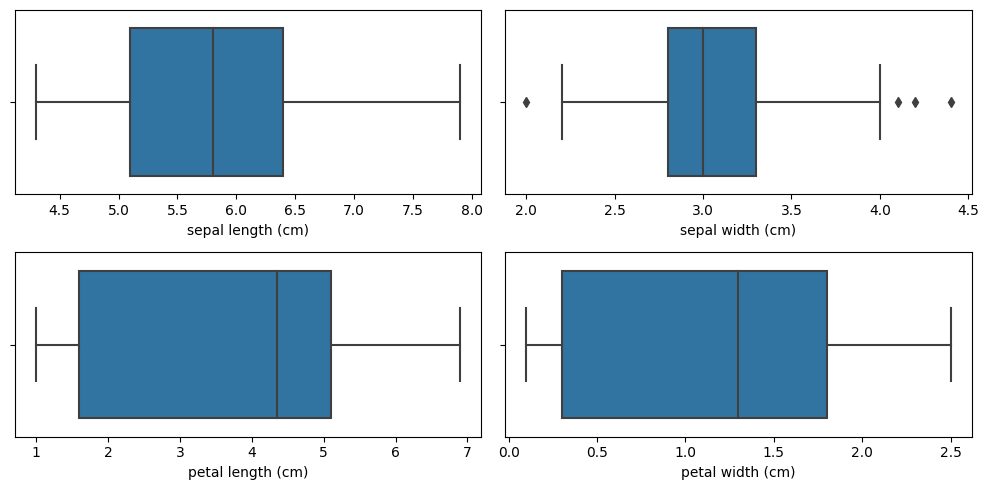

In [680]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 5))

sns.boxplot(x='sepal length (cm)', data=xy, ax=axes[0, 0])
sns.boxplot(x='sepal width (cm)', data=xy, ax=axes[0, 1])
sns.boxplot(x='petal length (cm)', data=xy, ax=axes[1, 0])
sns.boxplot(x='petal width (cm)', data=xy, ax=axes[1, 1])

plt.tight_layout()
plt.show()

#### Visualize the distribution of data for each label using a violin plot

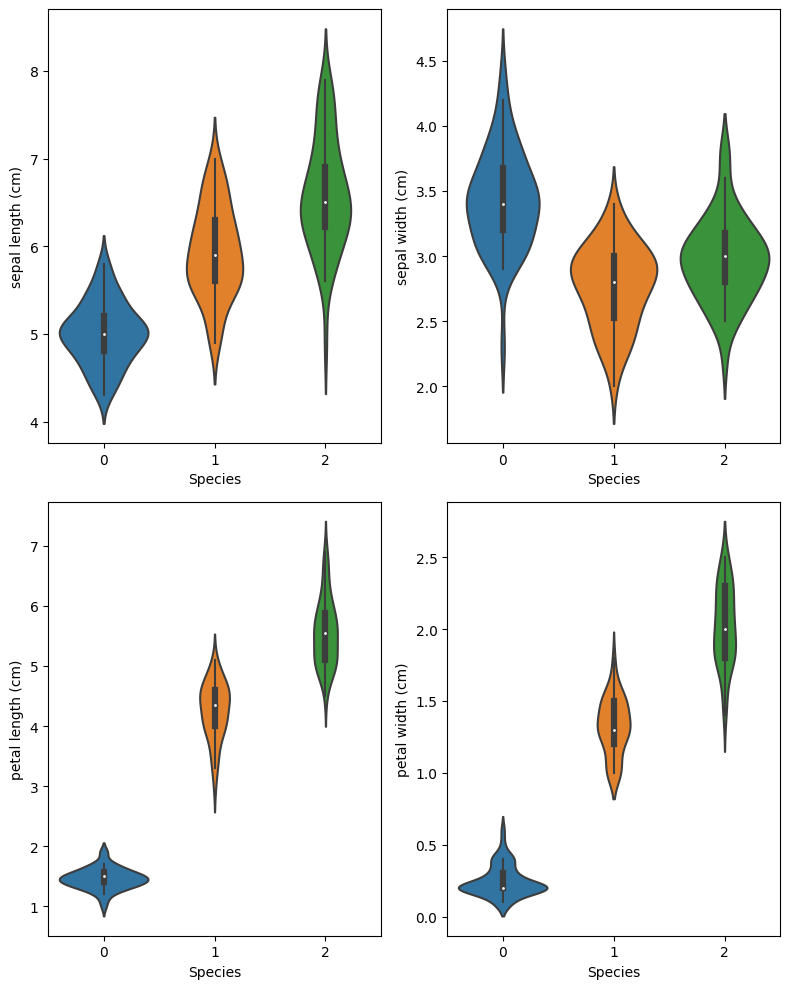

In [681]:
import seaborn as sns

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(8, 10))

sns.violinplot(x='Species', y='sepal length (cm)', data=xy, ax=axes[0, 0])
sns.violinplot(x='Species', y='sepal width (cm)', data=xy, ax=axes[0, 1])
sns.violinplot(x='Species', y='petal length (cm)', data=xy, ax=axes[1, 0])
sns.violinplot(x='Species', y='petal width (cm)', data=xy, ax=axes[1, 1])

plt.tight_layout()
plt.show()

#### Box plots vs violin plots

Box plots are like bullet points: concise, focusing on key statistics (median, quartiles, outliers). Violin plots are like paragraphs: detailed, revealing the full data distribution (shape, skewness). We generally choose box plots for quick comparisons, violin plots for deeper insights, especially with small datasets or non-symmetric distributions. Both can be used together for a complete picture!

### Problem 7: Confirming the relationship between features

#### Scatter plots of all feature combinations

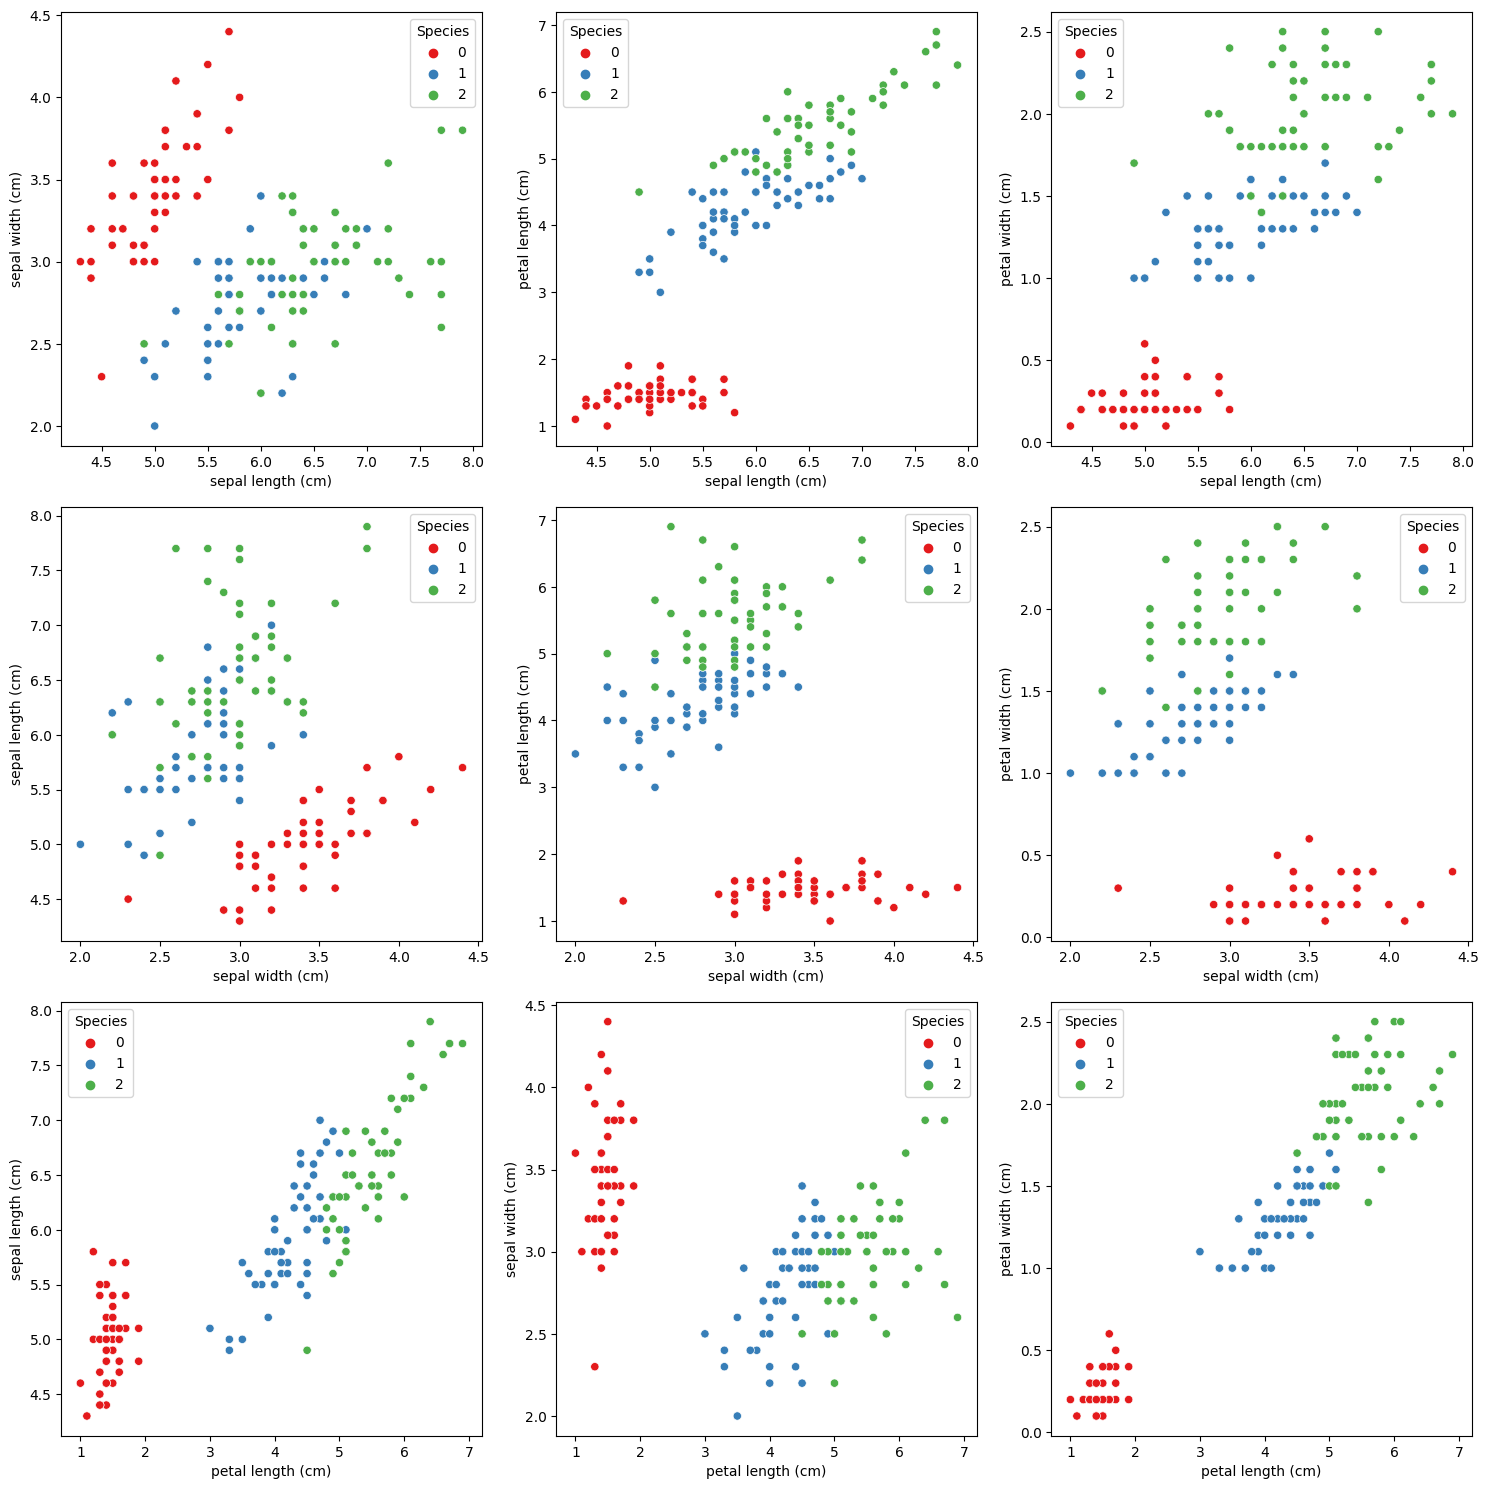

In [682]:
# sns.lmplot(x='sepal length (cm)', 
#            y='sepal width (cm)', 
#            data=xy,
#            fit_reg=False,
#            hue='Species')

# fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=xy, hue='Species', ax=axes[0], palette = 'Set1')
# sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=xy, hue='Species', ax=axes[1], palette = 'Set1')
# sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=xy, hue='Species', ax=axes[2], palette = 'Set1')


fig, axes = plt.subplots(3, 3, figsize=(15, 15))

sns.scatterplot(x='sepal length (cm)', y='sepal width (cm)', data=xy, hue='Species', ax=axes[0, 0], palette = 'Set1')
sns.scatterplot(x='sepal length (cm)', y='petal length (cm)', data=xy, hue='Species', ax=axes[0, 1], palette = 'Set1')
sns.scatterplot(x='sepal length (cm)', y='petal width (cm)', data=xy, hue='Species', ax=axes[0, 2], palette = 'Set1')

sns.scatterplot(x='sepal width (cm)', y='sepal length (cm)', data=xy, hue='Species', ax=axes[1, 0], palette = 'Set1')
sns.scatterplot(x='sepal width (cm)', y='petal length (cm)', data=xy, hue='Species', ax=axes[1, 1], palette = 'Set1')
sns.scatterplot(x='sepal width (cm)', y='petal width (cm)', data=xy, hue='Species', ax=axes[1, 2], palette = 'Set1')

sns.scatterplot(x='petal length (cm)', y='sepal length (cm)', data=xy, hue='Species', ax=axes[2, 0], palette = 'Set1')
sns.scatterplot(x='petal length (cm)', y='sepal width (cm)', data=xy, hue='Species', ax=axes[2, 1], palette = 'Set1')
sns.scatterplot(x='petal length (cm)', y='petal width (cm)', data=xy, hue='Species', ax=axes[2, 2], palette = 'Set1')

plt.tight_layout()
plt.show()

#### Scatterplot matrix that displays all combinations of features at once

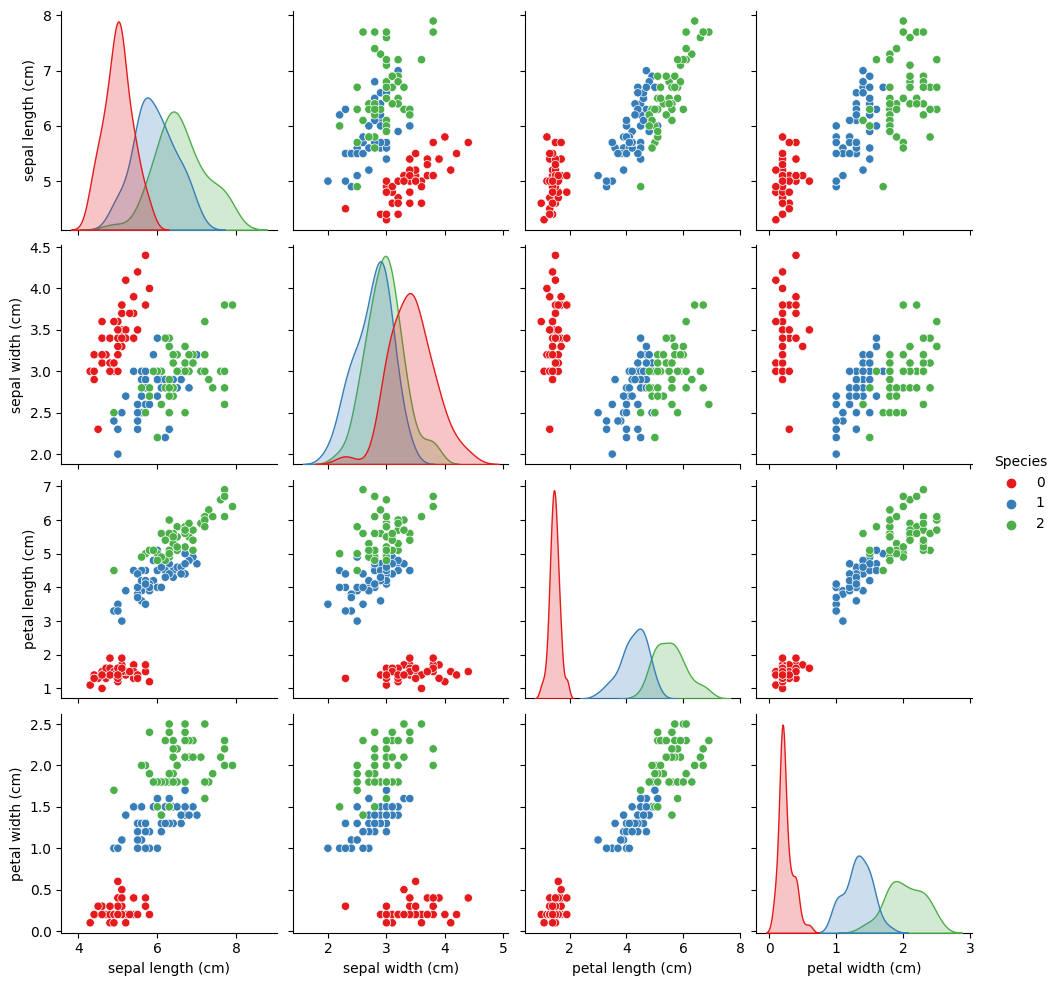

In [683]:
sns.pairplot(xy, 
             hue = 'Species', 
             vars = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'],
             palette = 'Set1'
             );

#### Correlation coefficient matrix for 4 features

In [684]:
xy.iloc[:,:4].corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


#### Heat map of the correlation coefficient matrix

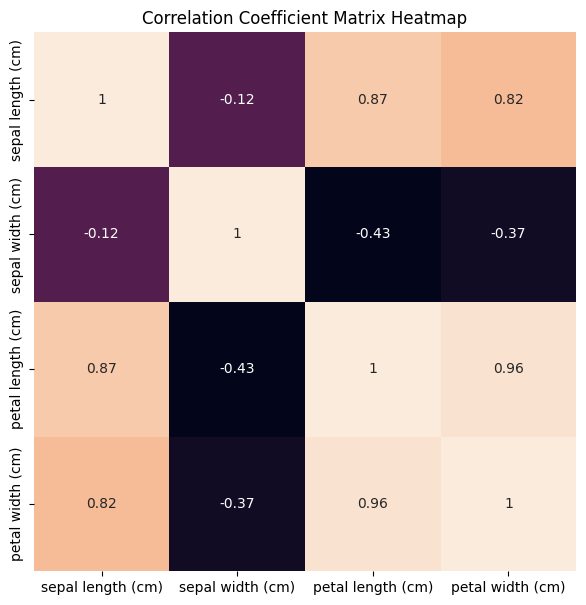

In [685]:
fig, axes = plt.subplots(figsize=(7,7))
sns.heatmap(xy.iloc[:,:4].corr(), annot = True, cbar=False)
plt.title('Correlation Coefficient Matrix Heatmap');

### Problem 8: Explaining the results of visualized graphs and tables

In [ ]:
#